<a href="https://colab.research.google.com/github/GabrielaRomoM/TAM-2025-2/blob/main/Tareas/TAM_010925.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [11]:
# import shutil
# shutil.rmtree('/content/TAM-2025-2')

#Carga de Imágenes

In [12]:
!git clone https://github.com/GabrielaRomoM/TAM-2025-2.git

Cloning into 'TAM-2025-2'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 132 (delta 14), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (132/132), 1.64 MiB | 18.64 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [13]:
# Cargar imagenes
face1 = mpimg.imread('/content/TAM-2025-2/Tareas/Images/face1.jpg')
face2 = mpimg.imread('/content/TAM-2025-2/Tareas/Images/face2.jpg')
face3 = mpimg.imread('/content/TAM-2025-2/Tareas/Images/face3.jpg')

#Medición de Distancias Euclidinianas

In [14]:
# Función para cargar y redimensionar (al mismo tamaño para todas las imágenes)
def load_and_resize(path, size=(200,200)):
    img = Image.open(path).resize(size)
    return np.array(img)

# Cargar imágenes redimensionadas
face1 = load_and_resize('/content/TAM-2025-2/Tareas/Images/face1.jpg')
face2 = load_and_resize('/content/TAM-2025-2/Tareas/Images/face2.jpg')
face3 = load_and_resize('/content/TAM-2025-2/Tareas/Images/face3.jpg')

# Aplanar imágenes en vectores
vec1 = face1.flatten()
vec2 = face2.flatten()
vec3 = face3.flatten()

# Función para calcular la distancia euclídiana
def euclidean_distance(v1, v2):
    return np.linalg.norm(v1 - v2)

# Calcular distancias entre pares
pairs = [
    ("face1-face2", euclidean_distance(vec1, vec2)),
    ("face1-face3", euclidean_distance(vec1, vec3)),
    ("face2-face3", euclidean_distance(vec2, vec3))
]

# Resultados

Distancia entre face1-face2: 48800.61
Distancia entre face1-face3: 57780.40
Distancia entre face2-face3: 58416.45

Las imágenes más parecidas son: face1-face2 (Distancia: 48800.61)



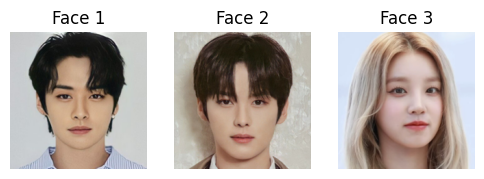

In [15]:
# Mostrar resultados
for pair, d in pairs:
    print(f"Distancia entre {pair}: {d:.2f}")

# Encontrar el par más parecido (con menor distancia)
closer = min(pairs, key=lambda x: x[1])
print(f"\nLas imágenes más parecidas son: {closer[0]} (Distancia: {closer[1]:.2f})\n")

#Mostrar imágenes
fig, axes = plt.subplots(1, 3, figsize=(6, 2))
axes[0].imshow(face1); axes[0].set_title("Face 1")
axes[1].imshow(face2); axes[1].set_title("Face 2")
axes[2].imshow(face3); axes[2].set_title("Face 3")
for ax in axes:
    ax.axis("off")
plt.show()

Se cumple el concepto de distancias euclidianas para machine learning donde la menor distancia representa mayor similitud, en este caso la menor distancia entre face1-face2 (48800.61) corresponde a las dos fotografías de la misma persona, mientras una distancia mayor se observa (57780.40, 58416.45) al comparar dichas fotos con las de una tercera fotografía de una persona diferente